# Script description

This is a script used in the publication: Walther R, Lancaster C, Burden J, Pichaud F 'A Dystroglycan-Laminin-Integrin axis controls cell basal geometry remodeling in the developing Drosophila retina'

This script takes the original cell shape descriptors from Cell Pose segmentation and Napari based regionprops analysis. It then perfoms PCA for each secondary and tertiary cell type comparing between pairs of genotypes e.g. comparing secondary pigment cells for Talin RNAi and beta integrin RNAi.

In [72]:
#Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from scipy import stats
import scipy as sp
import glob

In [73]:
#read datafiles
#Set file directory
os.chdir('/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/PCA_dataframes_from_2022_seg')
print(os.getcwd())

/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/PCA_dataframes_from_2022_seg


In [74]:
#list all csv files
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['data_check.csv',
 'PCA_ID3_MysDN_retina1_final_cells.csv',
 'PCA_ID12_MysDN_retina2_scaled.csv',
 'PCA_ID5_talinRNAi_retina2_scaled.csv',
 'PCA_ID15_Sarcdelta_RNAi_Confocal_retina_measurements1_cell_types_edited.csv',
 'PCA_wildtype_combined.csv',
 'PCA_ID13_SarcoglycanRNAi_Retina3_measurements1_celltypes_edited.csv',
 'PCA_ID1_talinRNAi_retina1_cell_types.csv',
 'PCA_ID7_DgRNAi_retina3_mask_set1_cell_types.csv',
 'PCA_ID4_DgRNAi_final_cells.csv',
 'PCA_ID10_DgRNAi_final_cells.csv',
 'PCA_ID9_talin2_measurements2_final.csv',
 'PCA_ID14_SarcRNAi_Retina4_measurements1_20220828_celltypes_edited.csv']

In [75]:
df_append = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file)
            df_append = df_append.append(df_temp, ignore_index=True)
df_append

/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_26312/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_26312/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_26312/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_26312/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,label,area_pixels,bbox_area,convex_area,equivalent_diameter,max_intensity,mean_intensity,...,standard_deviation_intensity,aspect_ratio,roundness,circularity,index,perimeter,area,cell_shape_index,id,cell_type
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,6.0,6505.0,11352.0,7165.0,91.007820,95.0,22.667640,...,11.450844,1.792550,0.538985,0.577983,6.0,26.551443,32.425099,4.662807,mysDN,tertiary
2,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,4.0,12.0,4594.0,7918.0,5101.0,76.480471,93.0,24.168481,...,15.813918,1.634100,0.536807,0.566108,12.0,22.545908,22.899447,4.711457,mysDN,tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7570,NaN,NaN,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7571,NaN,NaN,116.0,153.0,24282.0,36666.0,25936.0,175.831745,676.0,69.897661,...,73.539869,1.612443,0.607617,0.664013,153.0,23.920209,30.234076,4.350274,SarcRNAi,secondary
7572,NaN,NaN,117.0,155.0,20335.0,33075.0,21513.0,160.907819,523.0,81.880403,...,87.573635,1.901910,0.498832,0.603379,155.0,22.963502,25.319576,4.563625,SarcRNAi,secondary
7573,NaN,NaN,118.0,158.0,13886.0,28841.0,16005.0,132.966929,652.0,73.648783,...,86.573141,1.916972,0.503138,0.686719,158.0,17.787307,17.289778,4.277751,SarcRNAi,tertiary


In [76]:
#Drop unwanted columns from dataframe and save it as a new dataframe
drop_columns = ['area_pixels','label','bbox_area','convex_area','equivalent_diameter','max_intensity',
               'mean_intensity', 'min_intensity','perimeter_pixels','perimeter_crofton','local_centroid-0',
               'local_centroid-1','standard_deviation_intensity','index']


df_reduced=df_append.drop(columns=drop_columns)

In [77]:
df_dropped=df_reduced.dropna()
df_dropped

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,solidity,extent,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,perimeter,area,cell_shape_index,id,cell_type
1,1.0,1.0,1.0,0.907886,0.573027,129.757466,123.962476,69.154251,-0.364936,0.829932,1.792550,0.538985,0.577983,26.551443,32.425099,4.662807,mysDN,tertiary
4,4.0,4.0,4.0,0.900608,0.580197,108.673824,104.385852,63.879736,0.330582,0.790890,1.634100,0.536807,0.566108,22.545908,22.899447,4.711457,mysDN,tertiary
6,6.0,6.0,6.0,0.911884,0.652968,77.524190,67.409340,63.793750,-0.202563,0.323103,1.056676,0.881513,0.669178,17.160517,15.681685,4.333452,mysDN,bristle
7,7.0,7.0,7.0,0.970435,0.676413,67.007462,65.837994,49.443933,-0.620768,0.660309,1.331569,0.713484,0.812503,13.684318,12.107696,3.932714,mysDN,bristle
8,8.0,8.0,8.0,0.971862,0.835637,62.968246,63.722131,44.267493,0.054067,0.719304,1.439479,0.682321,0.852907,12.641558,10.846582,3.838435,mysDN,bristle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,2517.0,2517.0,112.0,0.906678,0.587371,263.759360,256.407813,123.376826,1.531267,0.876625,2.078249,0.418836,0.555376,24.684005,26.928274,4.756761,SarcRNAi,tertiary
2521,2521.0,2521.0,116.0,0.936228,0.662248,226.490618,225.570505,139.893592,-0.710818,0.784462,1.612443,0.607617,0.664013,23.920209,30.234076,4.350274,SarcRNAi,secondary
2522,2522.0,2522.0,117.0,0.945242,0.614815,237.255137,227.824345,119.787150,0.896650,0.850616,1.901910,0.498832,0.603379,22.963502,25.319576,4.563625,SarcRNAi,secondary
2523,2523.0,2523.0,118.0,0.867604,0.481467,200.771014,187.456304,97.787696,1.204244,0.853156,1.916972,0.503138,0.686719,17.787307,17.289778,4.277751,SarcRNAi,tertiary


In [78]:
#Need to split dataframe for cell types 

secondary=df_reduced[df_reduced["cell_type"]=='secondary']

tertiary=df_reduced[df_reduced["cell_type"]=='tertiary']

In [79]:
#Subset dataframe for each cell type into genotypes
#Set 1: Mys, Talin
#Set 2: Dg, Sarc

values1= ['mysDN','talin_RNAi']
values2= ['SarcRNAi','Dg_RNAi']

secondary_integrin= secondary[secondary['id'].isin(values1)]

secondary_sarc= secondary[secondary['id'].isin(values2)]

tertiary_integrin= tertiary[tertiary['id'].isin(values1)]

tertiary_sarc= tertiary[tertiary['id'].isin(values2)]

In [80]:
#Functon for PCA analysis

def PCA_func(dataframe,target_select,labels,save_option,filename):
    #PCA between genotypes for secondary pigment cell - have id as target

    #PCA analysis to reduce the dimentions of the data to be ploted in 2D

    from sklearn.preprocessing import StandardScaler

    features=['extent','major_axis_length','minor_axis_length','eccentricity',
             'roundness','circularity','area','cell_shape_index','perimeter']

    # Separating out the features
    x = dataframe.loc[:, features].values

    # Separating out the target
    y = dataframe.loc[:,['id']].values

    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    
    dataframe= dataframe.reset_index()

    finalDf = pd.concat([principalDf, dataframe[['id']]], axis = 1)
    
    
    target=target_select

    target_labels=labels


    fig = plt.figure(figsize = (12,11))
    ax = fig.add_subplot(1,1,1) 

    ax.tick_params(width=6)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(6)

    ax.set_xlabel('PC1', fontsize = 45, fontname="Helvetica")
    ax.set_ylabel('PC2', fontsize = 45, fontname="Helvetica")
    targets = target
    colors = ['m', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['id'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 100)
    ax.legend(target_labels, fontsize=20)

    plt.yticks(fontsize=35)
    plt.xticks(fontsize=35)

    sns.despine()

    if save_option==1:

        plt.savefig(filename + 'PCA_plots.png', dpi=500)

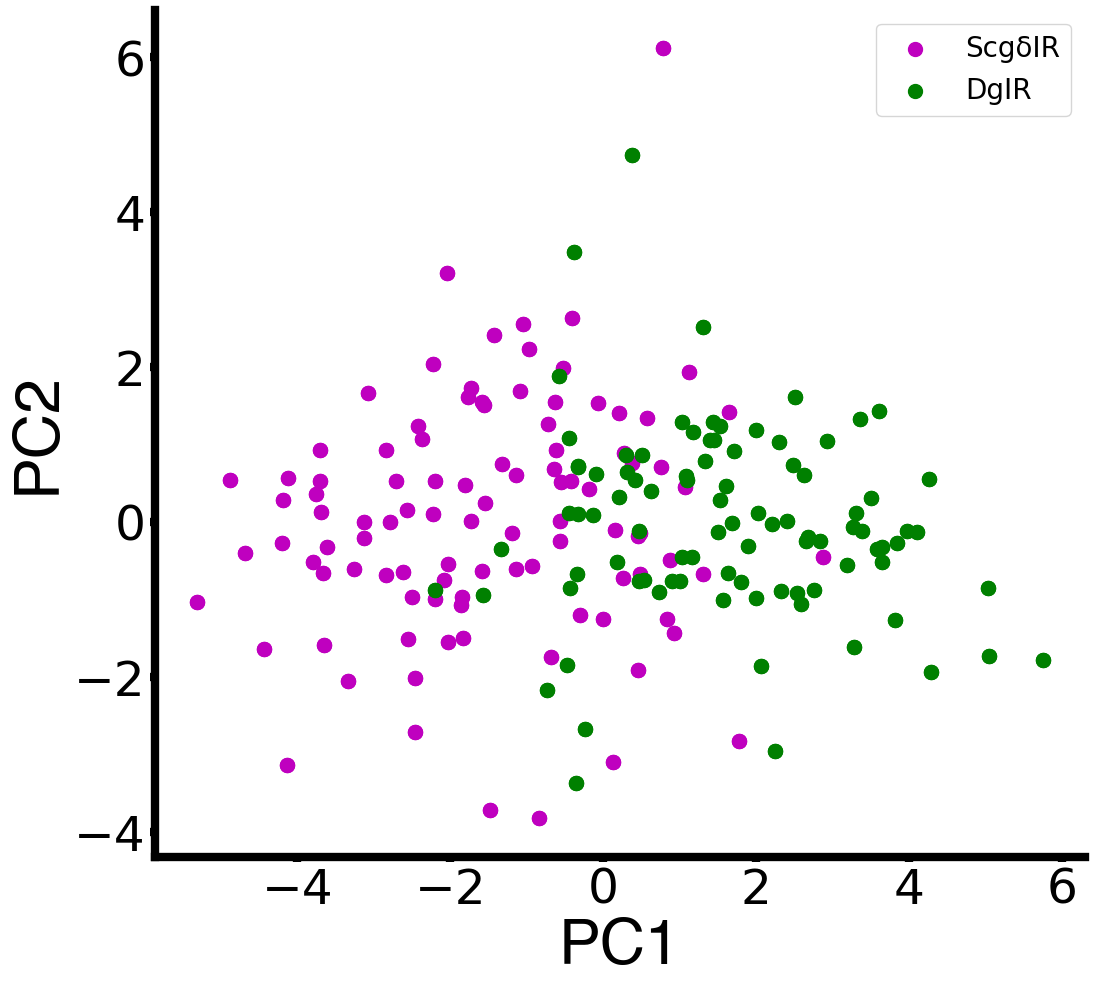

In [99]:
target_select_sarc=['SarcRNAi','Dg_RNAi']
labels_sarc=['ScgδIR','DgIR']


PCA_func(secondary_sarc, target_select_sarc, labels_sarc,1, 'secondary_sarc_dg_2')

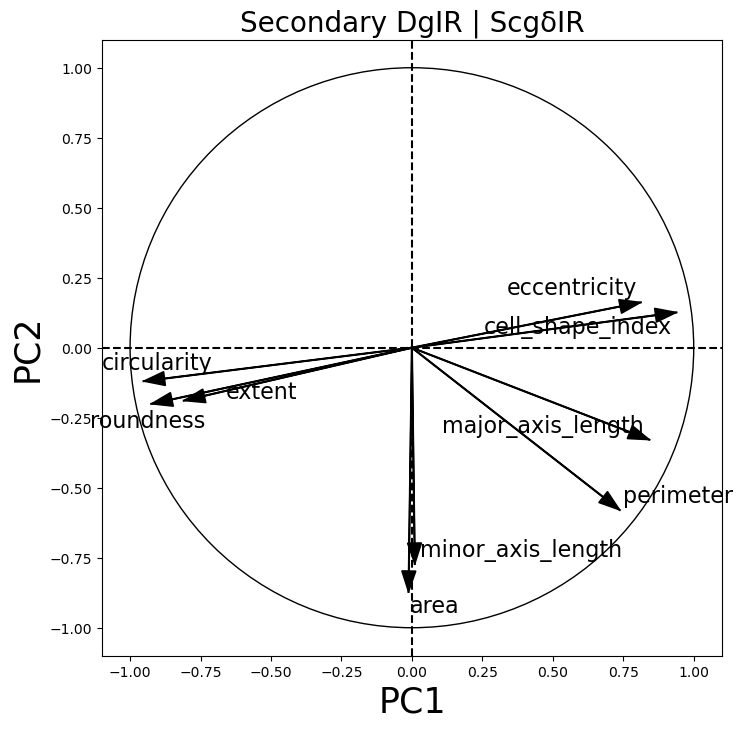

In [100]:
from mlxtend.plotting import plot_pca_correlation_graph

from sklearn.preprocessing import StandardScaler

features=['extent','major_axis_length','minor_axis_length','eccentricity',
        'roundness','circularity','area','cell_shape_index','perimeter']

x= secondary_sarc.loc[:, features].values

x = StandardScaler().fit_transform(x)



feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Secondary DgIR | ScgδIR', fontsize=20)

#plt.savefig('Correlation_circle_Dg_Sarc_secondary_2.png', dpi=500)

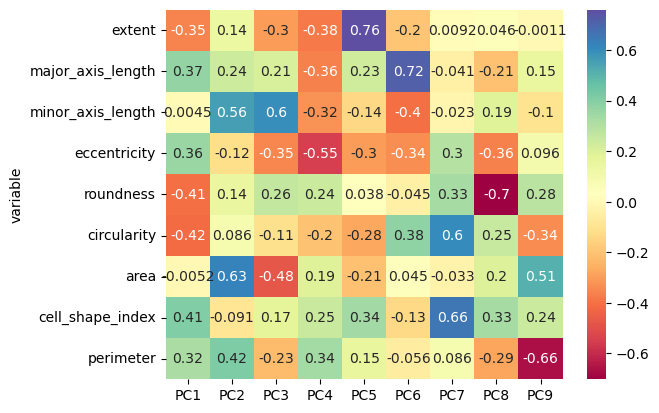

In [95]:
from sklearn.decomposition import PCA
pca_out = PCA().fit(x)

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

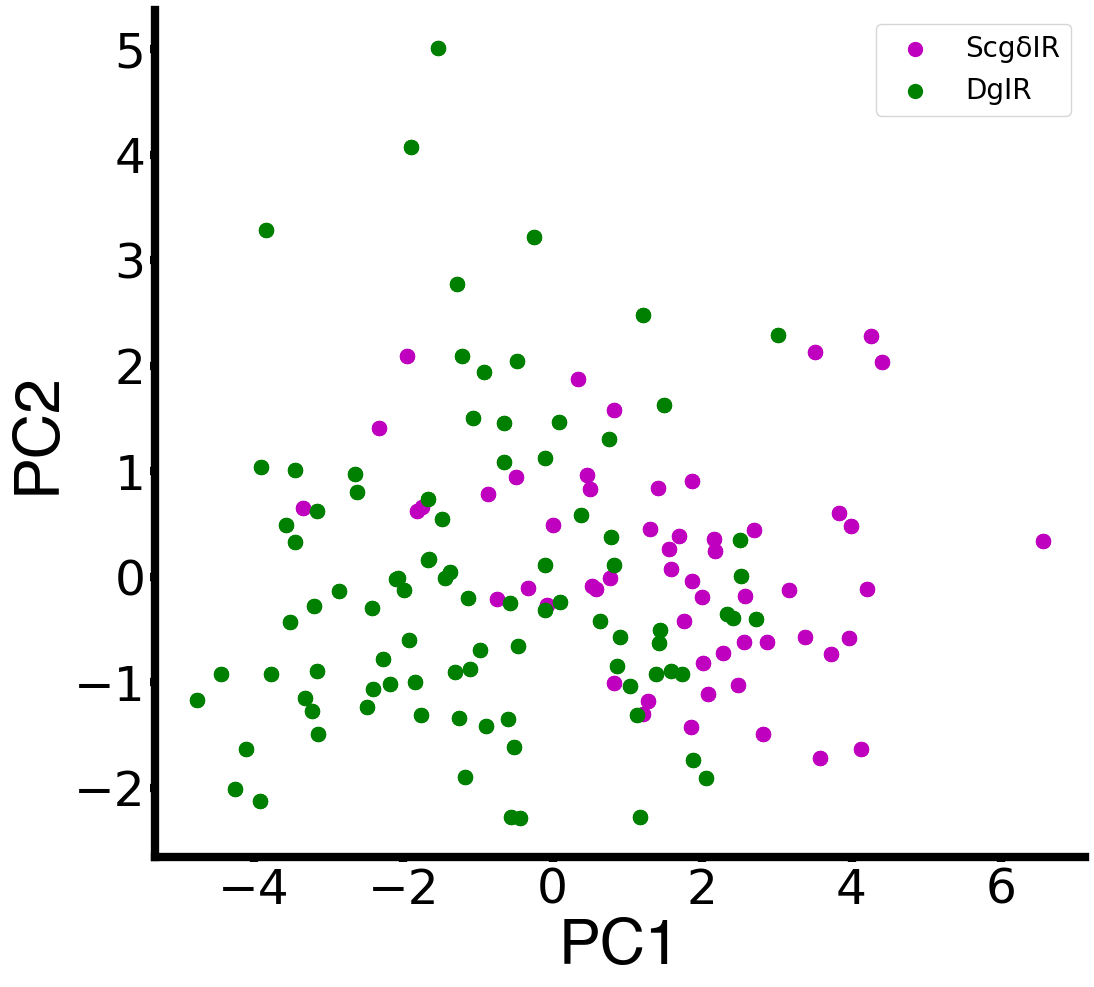

In [101]:
target_select_sarc_tert=['SarcRNAi','Dg_RNAi']
labels_sarc_tert=['ScgδIR','DgIR']


PCA_func(tertiary_sarc, target_select_sarc_tert, labels_sarc_tert,0,'teriary_sarc_dg')

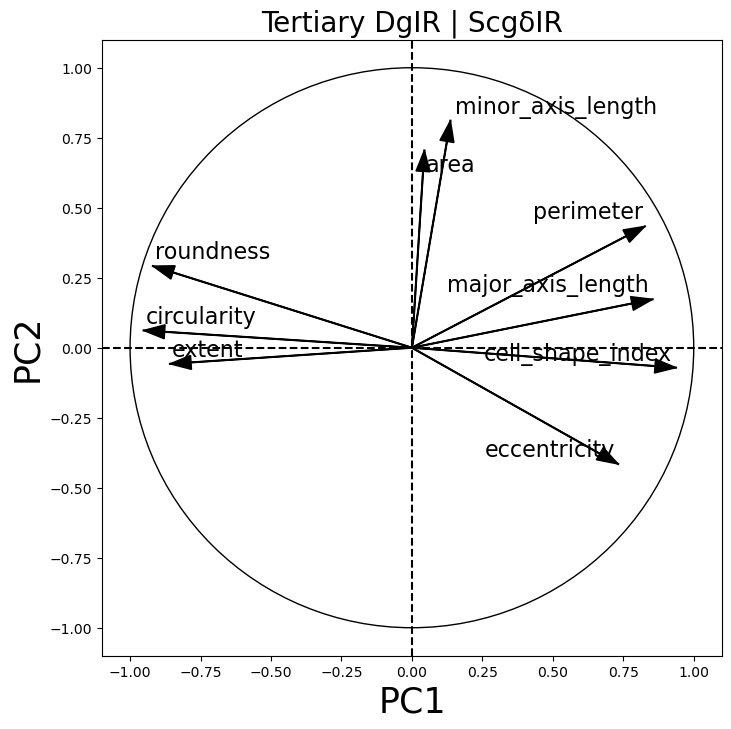

In [103]:
from mlxtend.plotting import plot_pca_correlation_graph

from sklearn.preprocessing import StandardScaler

features=['extent','major_axis_length','minor_axis_length','eccentricity',
        'roundness','circularity','area','cell_shape_index','perimeter']

x= tertiary_sarc.loc[:, features].values

x = StandardScaler().fit_transform(x)



feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Tertiary DgIR | ScgδIR', fontsize=20)

#plt.savefig('Correlation_circle_Dg_Sarc_tertiary.png', dpi=500)

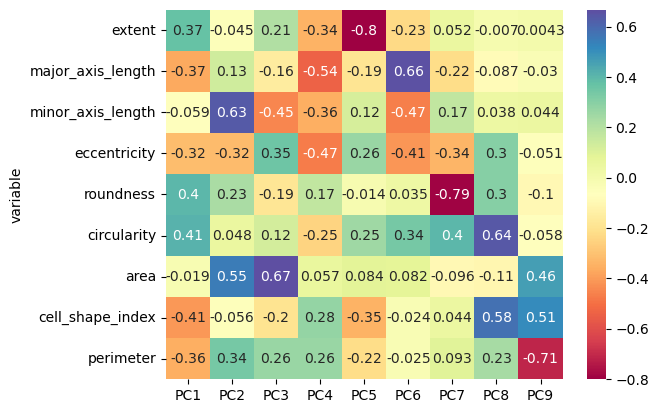

In [98]:
from sklearn.decomposition import PCA
pca_out = PCA().fit(x)

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

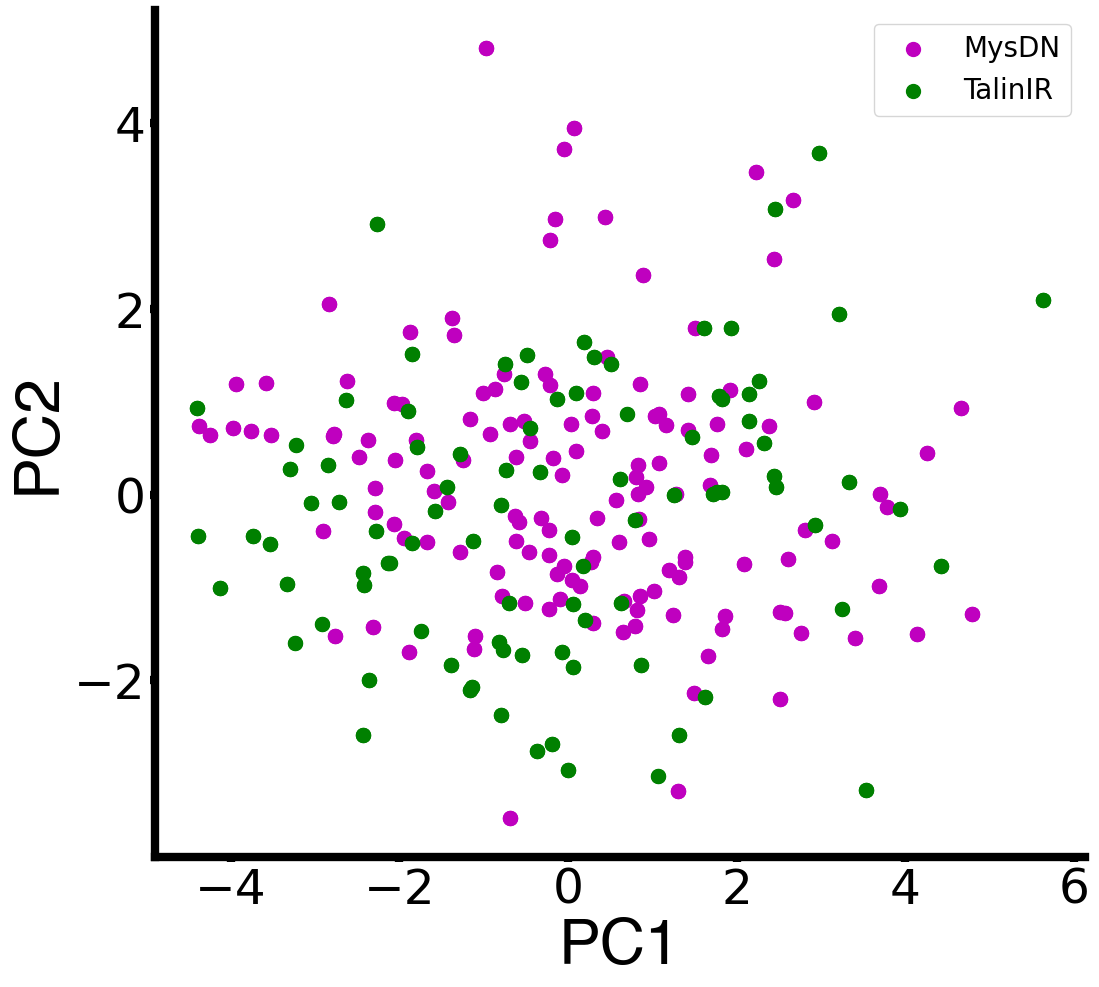

In [91]:
target_select_integrin_sec=['mysDN','talin_RNAi']
labels_integrin_sec=['MysDN','TalinIR']


PCA_func(secondary_integrin, target_select_integrin_sec, labels_integrin_sec,0, 'secondary_mysDN_talin')

Text(0.5, 1.0, 'Secondary MysDN | TalinIR')

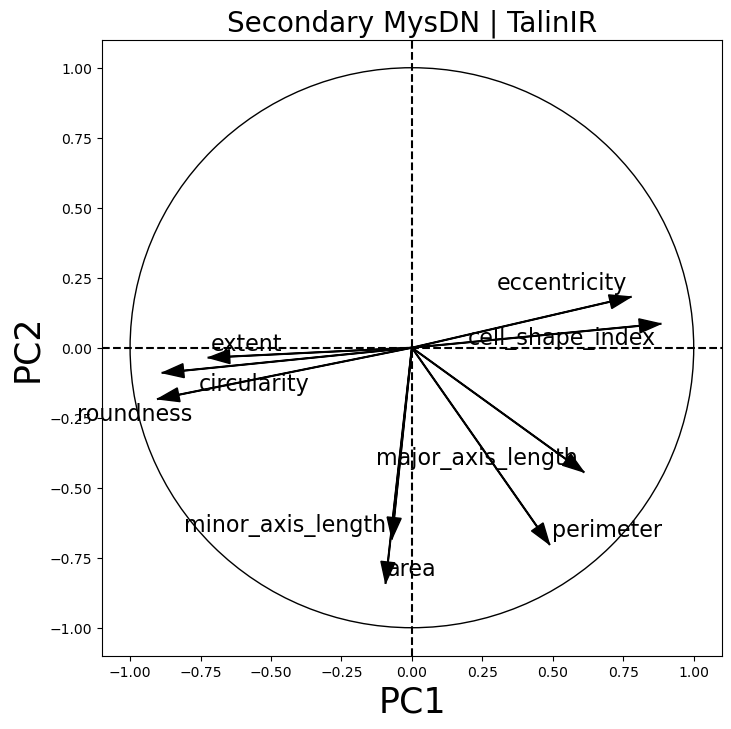

In [92]:
from mlxtend.plotting import plot_pca_correlation_graph

from sklearn.preprocessing import StandardScaler

features=['extent','major_axis_length','minor_axis_length','eccentricity',
        'roundness','circularity','area','cell_shape_index','perimeter']

x= secondary_integrin.loc[:, features].values

x = StandardScaler().fit_transform(x)



feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Secondary MysDN | TalinIR', fontsize=20)

#plt.savefig('Correlation_circle_Secondary_MysDN_TalinIR.png', dpi=500)

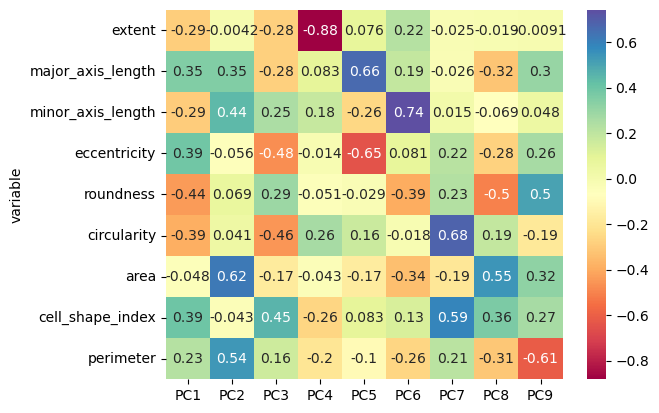

In [33]:
from sklearn.decomposition import PCA
pca_out = PCA().fit(x)

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

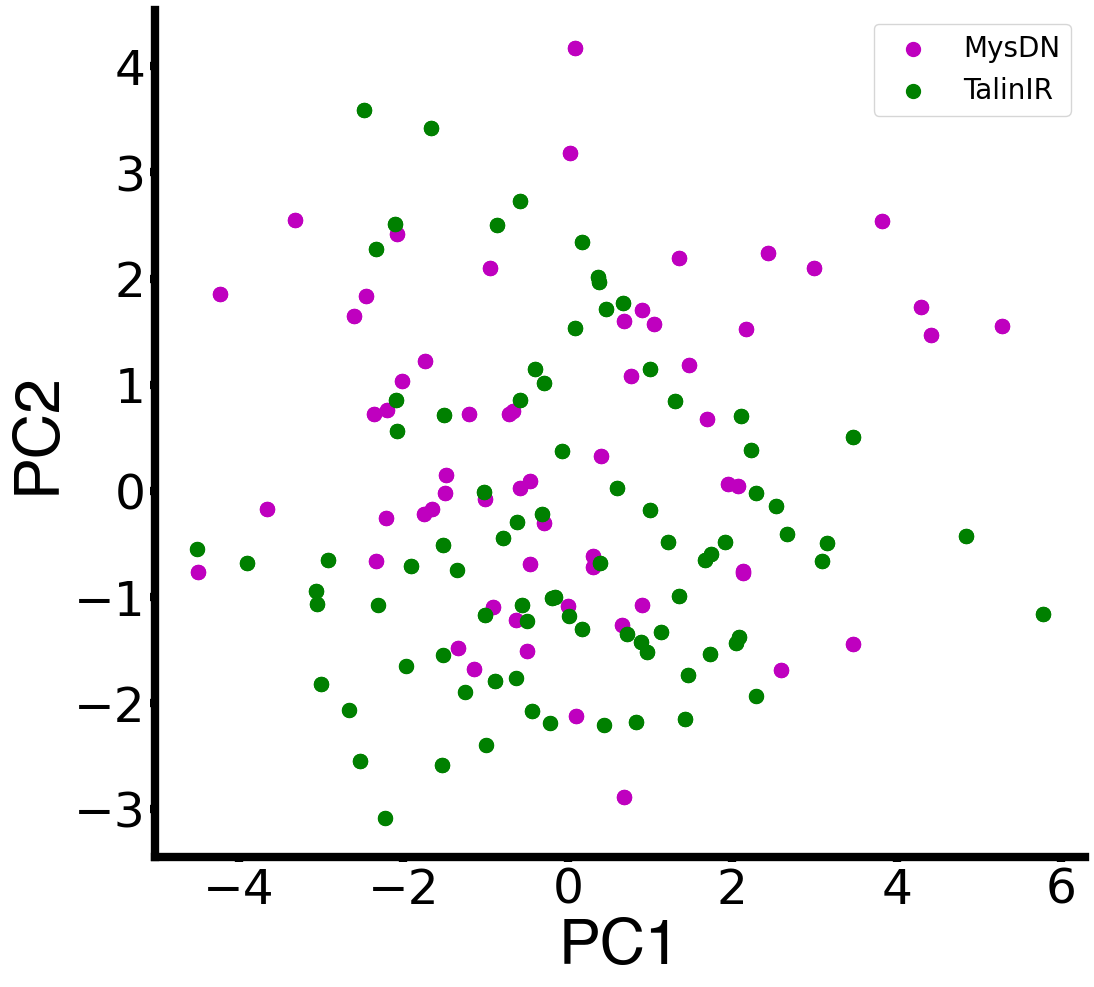

In [65]:
target_select_integrin_tert=['mysDN','talin_RNAi']
labels_integrin_tert=['MysDN','TalinIR']


PCA_func(tertiary_integrin, target_select_integrin_tert, labels_integrin_tert,0,'tertiary_MysDN_Talin')

Text(0.5, 1.0, 'Tertiary MysDN | TalinIR')

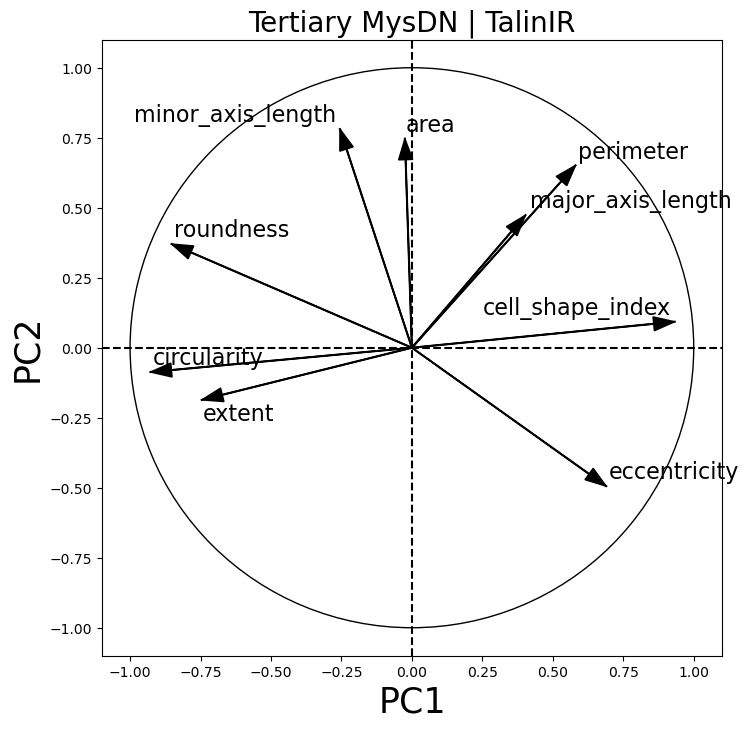

In [66]:
from mlxtend.plotting import plot_pca_correlation_graph

from sklearn.preprocessing import StandardScaler

features=['extent','major_axis_length','minor_axis_length','eccentricity',
        'roundness','circularity','area','cell_shape_index','perimeter']

x= tertiary_integrin.loc[:, features].values

x = StandardScaler().fit_transform(x)



feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Tertiary MysDN | TalinIR', fontsize=20)

#plt.savefig('Correlation_circle_Tertiary_MysDN_TalinIR.png', dpi=500)

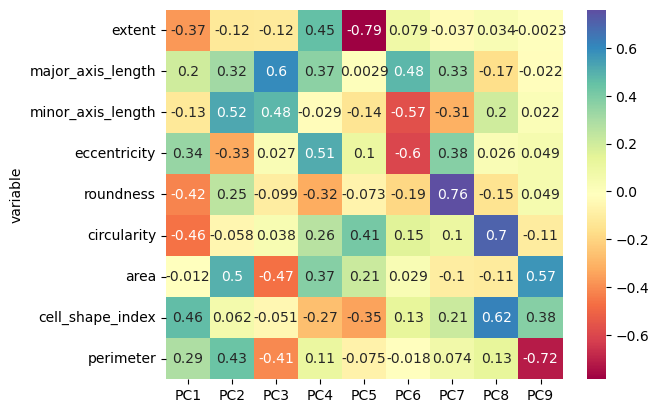

In [67]:
from sklearn.decomposition import PCA
pca_out = PCA().fit(x)

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()